In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt # plotting
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
fraud_data=pd.read_csv('/content/Fraud_Data.csv')

In [ ]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
fraud_data['age']

0         39
1         53
2         53
3         41
4         45
          ..
151107    28
151108    32
151109    26
151110    37
151111    38
Name: age, Length: 151112, dtype: int64

In [ ]:
type(fraud_data.age.to_numpy())

numpy.ndarray

In [ ]:
len(fraud_data["ip_address"].unique())

143512

In [ ]:
fraud_data["ip_address"].unique()

array([7.32758369e+08, 3.50311388e+08, 2.62147382e+09, ...,
       2.74847052e+09, 3.60117471e+09, 4.10382451e+09])

almost each ip address is unique

In [ ]:
fraud_data['ip_address'][0]

732758368.79972

In [ ]:
ip_address_to_country=pd.read_csv('/content/IpAddress_to_Country.csv')

In [ ]:
ip_address_to_country

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [ ]:
ip_address_to_country.upper_bound_ip_address.astype("float")
ip_address_to_country.lower_bound_ip_address.astype("float")
fraud_data.ip_address.astype("float")
def IP_to_country(ip) :
    try :
        return ip_address_to_country.country[(ip_address_to_country.lower_bound_ip_address < ip)                            
                                & 
                                (ip_address_to_country.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Unknown"

In [ ]:
country=list(map(IP_to_country,fraud_data["ip_address"]))

In [ ]:
fraud_data['country']=country

In [ ]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [ ]:
dup_table = pd.DataFrame(fraud_data.duplicated(subset = "device_id"))
dup_rate = dup_table.mean()
print(float(dup_rate*100))



8.706125258086717


In [ ]:
device_duplicates = pd.DataFrame(fraud_data.groupby(by = "device_id").device_id.count())

In [ ]:
device_duplicates.rename(columns={"device_id": "freq_device"}, inplace=True)

In [ ]:
device_duplicates

,device_id,freq_device
0,AAALBGNHHVMKG,1
1,AAAWIHVCQELTP,1
2,AAAXJHWCLISKY,1
3,AAAXXOZJRZRAO,11
4,AABFGRPBQHWFQ,1
...,...,...
137951,ZZZGSIJRNCXBJ,1
137952,ZZZIKLJSVSQMF,1
137953,ZZZKJIZHJEDFN,1
137954,ZZZMVOGBAJVTM,1


In [ ]:
device_duplicates.reset_index(level=0, inplace= True)

In [ ]:
device_duplicates

,device_id,freq_device
0,AAALBGNHHVMKG,1
1,AAAWIHVCQELTP,1
2,AAAXJHWCLISKY,1
3,AAAXXOZJRZRAO,11
4,AABFGRPBQHWFQ,1
...,...,...
137951,ZZZGSIJRNCXBJ,1
137952,ZZZIKLJSVSQMF,1
137953,ZZZKJIZHJEDFN,1
137954,ZZZMVOGBAJVTM,1


In [ ]:
fraud_data = fraud_data.merge(device_duplicates, on= "device_id")

In [ ]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,356404,2015-02-04 10:27:49,2015-05-07 19:37:56,41,FXBMCMIOLLNCJ,SEO,Chrome,M,26,1.827348e+09,0,United States,1
151108,151643,2015-02-15 20:03:27,2015-05-07 19:28:52,23,THQOCEAVXXAIW,Ads,FireFox,M,18,1.691181e+09,0,United States,1
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1


In [ ]:
type(fraud_data['signup_time'][0])

str

In [ ]:
in_t=pd.to_datetime(fraud_data['signup_time'])
pur_t=pd.to_datetime(fraud_data['purchase_time'])

In [ ]:
buy_t=(pur_t-in_t)/pd.Timedelta(hours=1)
buy_t

0         1251.856111
1            4.984444
2            0.000278
3            0.000278
4            0.000278
             ...     
151107    2217.168611
151108    1943.423611
151109     258.686111
151110    1856.004444
151111     979.025833
Length: 151112, dtype: float64

In [ ]:
fraud_data['buy_t']=buy_t

In [ ]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,freq_device,buy_t
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,0.000278
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,0.000278
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,356404,2015-02-04 10:27:49,2015-05-07 19:37:56,41,FXBMCMIOLLNCJ,SEO,Chrome,M,26,1.827348e+09,0,United States,1,2217.168611
151108,151643,2015-02-15 20:03:27,2015-05-07 19:28:52,23,THQOCEAVXXAIW,Ads,FireFox,M,18,1.691181e+09,0,United States,1,1943.423611
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,1,258.686111
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,1,1856.004444


In [ ]:
fraud_data=pd.get_dummies(fraud_data, columns=['source', 'sex','browser' ], drop_first=True)

In [ ]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,freq_device,buy_t,source_Direct,source_SEO,sex_M,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,Japan,1,1251.856111,0,1,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,United States,1,4.984444,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,United States,12,0.000278,0,1,1,0,0,1,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,United States,12,0.000278,0,1,1,0,0,1,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,United States,12,0.000278,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,356404,2015-02-04 10:27:49,2015-05-07 19:37:56,41,FXBMCMIOLLNCJ,26,1.827348e+09,0,United States,1,2217.168611,0,1,1,0,0,0,0
151108,151643,2015-02-15 20:03:27,2015-05-07 19:28:52,23,THQOCEAVXXAIW,18,1.691181e+09,0,United States,1,1943.423611,0,0,1,1,0,0,0
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,32,2.439047e+09,0,Netherlands,1,258.686111,0,1,1,0,0,0,1
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,26,2.748471e+09,0,Japan,1,1856.004444,0,1,0,0,1,0,0


In [ ]:
scaler=StandardScaler()

In [ ]:
fraud_data[['purchase_value','age','buy_t','freq_device']]=scaler.fit_transform(fraud_data[['purchase_value','age','buy_t','freq_device']])

In [ ]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,freq_device,buy_t,source_Direct,source_SEO,sex_M,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,7.327584e+08,0,Japan,-0.261514,-0.136057,0,1,1,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,3.503114e+08,0,United States,-0.261514,-1.571877,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,United States,3.941861,-1.577617,0,1,1,0,0,1,0
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,United States,3.941861,-1.577617,0,1,1,0,0,1,0
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,United States,3.941861,-1.577617,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,356404,2015-02-04 10:27:49,2015-05-07 19:37:56,0.221836,FXBMCMIOLLNCJ,-0.828608,1.827348e+09,0,United States,-0.261514,0.975538,0,1,1,0,0,0,0
151108,151643,2015-02-15 20:03:27,2015-05-07 19:28:52,-0.760552,THQOCEAVXXAIW,-1.756930,1.691181e+09,0,United States,-0.261514,0.660310,0,0,1,1,0,0,0
151109,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,-0.132367,2.439047e+09,0,Netherlands,-0.261514,-1.279730,0,1,1,0,0,0,1
151110,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,-0.828608,2.748471e+09,0,Japan,-0.261514,0.559643,0,1,0,0,1,0,0


In [ ]:
X=fraud_data.drop(columns=['user_id','purchase_time','signup_time','device_id','ip_address','class','country' ])

In [ ]:
X

,purchase_value,age,freq_device,buy_t,source_Direct,source_SEO,sex_M,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,-0.160204,0.679914,-0.261514,-0.136057,0,1,1,0,0,0,0
1,-1.142592,2.304476,-0.261514,-1.571877,0,0,0,0,0,0,0
2,-1.197169,2.304476,3.941861,-1.577617,0,1,1,0,0,1,0
3,-1.197169,2.304476,3.941861,-1.577617,0,1,1,0,0,1,0
4,-1.197169,2.304476,3.941861,-1.577617,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,0.221836,-0.828608,-0.261514,0.975538,0,1,1,0,0,0,0
151108,-0.760552,-1.756930,-0.261514,0.660310,0,0,1,1,0,0,0
151109,-0.105627,-0.132367,-0.261514,-1.279730,0,1,1,0,0,0,1
151110,0.167258,-0.828608,-0.261514,0.559643,0,1,0,0,1,0,0


<AxesSubplot:>

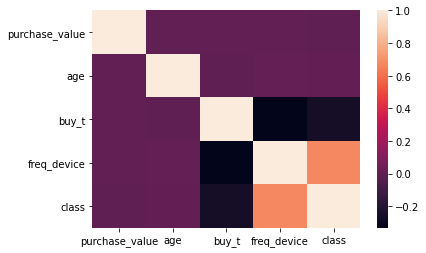

In [ ]:
corr=fraud_data[['purchase_value','age','buy_t','freq_device','class']]
sns.heatmap(corr.corr())


In [ ]:
Y=pd.DataFrame(fraud_data['class'])

In [ ]:
Y

,class
0,0
1,0
2,1
3,1
4,1
...,...
151107,0
151108,0
151109,0
151110,0


In [ ]:
Y.value_counts()

class
0        136961
1         14151
dtype: int64

data is highly imbalanced as we see

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    Y, 
    test_size=0.2,
    random_state=0)
print(len(X_train))
print(len(y_train))

120889
120889


## Dealing with imbalanced data with SMOTE algorithm

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
len(X_train_sm)

219092

In [ ]:
X_train_sm

,purchase_value,age,freq_device,buy_t,source_Direct,source_SEO,sex_M,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,-1.033438,-0.364448,-0.261514,-1.265675,0,1,1,0,0,0,0
1,-0.051050,0.679914,-0.261514,-1.330714,1,0,1,0,0,0,0
2,1.040492,1.144074,0.120611,1.684387,0,1,1,1,0,0,0
3,0.385567,1.028034,-0.261514,1.676199,0,1,1,0,0,0,0
4,-0.651398,-0.364448,4.323986,-1.577617,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
219087,-0.815129,-0.016327,3.559736,-1.577617,0,0,0,0,0,0,0
219088,0.224724,0.747082,0.080377,1.550767,0,1,1,0,0,1,0
219089,-0.727802,-0.196188,-0.261514,0.641052,0,0,1,0,0,0,0
219090,0.324776,0.062941,-0.261514,1.075501,0,1,1,1,0,0,0


## Modelling

In [ ]:
# train the model on train set
lr2 = LogisticRegression(max_iter=10000)
lr2.fit(X_train_sm, y_train_sm)
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95     27415
           1       0.55      0.68      0.60      2808

    accuracy                           0.92     30223
   macro avg       0.76      0.81      0.78     30223
weighted avg       0.93      0.92      0.92     30223



![image.png](attachment:a328c4df-b08c-4a0c-9a03-3848afb2c897.png)


as we can see that in our case recall is very low for frauds

In [ ]:
frauds_in_test=y_test[y_test['class']==1]

In [ ]:
len(frauds_in_test)

In [ ]:

frauds_predicted=len([i for i in predictions if i==1 ])
print(frauds_predicted)

In [ ]:
compare=pd.DataFrame(y_test['class']-predictions)

In [ ]:
len(compare[compare['class']==0])/len(compare)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)


In [ ]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_sm, y = y_train_sm, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})


g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_sm, y_train_sm)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train_sm, y_train_sm)
acc_random_forest = round(random_forest.score(X_train_sm, y_train_sm) * 100, 2)
acc_random_forest

In [ ]:
print(classification_report(y_test, Y_pred))

In [ ]:
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())